In [61]:
# %pip install numpy
# %pip install opencv-python-headless
# %pip install tensorflow tensorflow-hub
# %pip install transformers
# %pip install opencv-python
# %pip install pillow
# %pip install torch
# %pip install torchvision
# %pip install matplotlib
# %pip install pycocotools
# %pip install --upgrade scikit-image scipy
# %pip install timm
# %pip install mysql-connector-python
# %pip install ultralytics
# %pip install streamlit
# %pip install gradio

# %pip install langchain-core



In [15]:
import torch
from torchvision.io import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
import torchvision.transforms as T
import numpy as np


In [2]:
preprocess = T.Compose([
    T.ConvertImageDtype(torch.float32),   
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

In [3]:
image_path = 'data\input_images\dogandgirl.jpg'
input_image1 = read_image(image_path)
input_image = preprocess(input_image1).unsqueeze(0)

In [4]:
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [5]:
with torch.no_grad():
    output = model(input_image)['out']
    segmented_output = torch.argmax(output.squeeze(), dim=0).byte()

### **CLASSES AND OBJECTS EXAMPLES**

In [85]:
image_path = 'data\input_images\dogandgirl.jpg'
input_image1 = read_image(image_path)

In [86]:
from utils.preprocessing import preprocess
pp= preprocess(input_image1)
output_image = pp.preprocessed_image()

In [87]:
from models.segmentation_model import SegmentImage
SI= SegmentImage()
out_put, seg_ment= SI.get_segments(output_image)

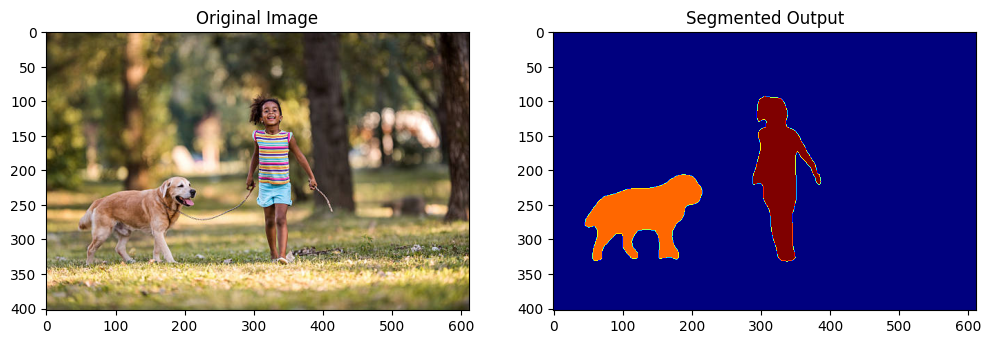

In [88]:
from utils.visualization import visualization
vis = visualization(input_image1,seg_ment)
vis.display_img()

In [90]:
from utils.database import DatabaseConnector,SegmentedObjectSaver
from PIL import Image
input_image= Image.open("data\input_images\dogandgirl.jpg")
output_path = "data\Segmented_objects"
db_connector= DatabaseConnector("localhost","root","Shivam@2003","image_segmentation")
object_saver = SegmentedObjectSaver(input_image,seg_ment,output_path,db_connector)

object_saver.save_segmented_objects()


Connection to MySQL DB successful
Query executed successfully
Query executed successfully


###  ==============================

In [65]:
segmented_image = to_pil_image(seg_ment.byte())

In [91]:
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(to_pil_image(input_image1.squeeze()))
# plt.title('Original Image')

# plt.subplot(1, 2, 2)
# plt.imshow(segmented_image, cmap='jet')
# plt.title('Segmented Output')

# plt.show()

In [12]:
input_image_pil = to_pil_image(input_image1.squeeze(0))

In [13]:
import os
output_dir = 'data\Segmented_objects'


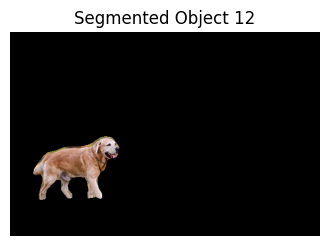

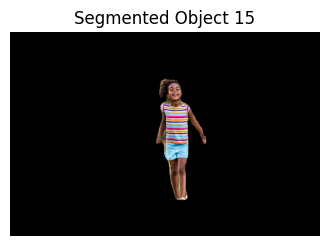

In [16]:
output_dir = 'data\Segmented_objects'


unique_labels = np.unique(segmented_output)
for label in unique_labels:
    if label == 0:
        continue  
    
    
    mask = segmented_output == label
    
    
    object_image = np.array(input_image_pil) * np.stack([mask]*3, axis = -1)
    
    # Converted the masked image to a PIL image and save it
    object_image_pil = Image.fromarray(object_image.astype(np.uint8))
    object_image_pil.save(os.path.join(output_dir, f'segmented_object_{label}.png'))
    
   
    plt.figure(figsize=(4, 4))
    plt.imshow(object_image_pil)
    plt.title(f'Segmented Object {label}')
    plt.axis('off')
    plt.show()

 ## Connecting and saving to database

In [91]:
import mysql.connector
from mysql.connector import Error
import cv2
import cv2
import numpy as np
from PIL import Image
import os
import uuid

In [92]:
def create_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")
    
    return connection

In [93]:
connection = create_connection("localhost", "root", "Shivam@2003", "image_segmentation")

Connection to MySQL DB successful


In [94]:
def execute_query(connection, query, data):
    cursor = connection.cursor()
    try:
        cursor.execute(query, data)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [95]:
output_dir = 'data\Segmented_objects'

In [96]:
master_id = str(uuid.uuid4())
unique_labels = np.unique(segmented_output)

In [97]:

for label in unique_labels:
    if label == 0:
        continue  # Skip background

    # Create a mask for the current label
    mask = segmented_output == label
    
    # Apply the mask to the original image
    object_image = np.array(input_image_pil) * np.stack([mask]*3, axis=-1)
    
    # Convert the masked image to a PIL image and save it
    object_image_pil = Image.fromarray(object_image.astype(np.uint8))
    object_path = os.path.join(output_dir, f'segmented_object_{label}.png')
    object_image_pil.save(object_path)
    
    # Generate a unique ID for the object
    object_id = str(uuid.uuid4())
    
    # SQL query to insert metadata
    query = """
    INSERT INTO objects_metadata (object_id, master_id, label, image_path) 
    VALUES (%s, %s, %s, %s)
    """
    data = (object_id, master_id, int(label), object_path)
    
    # Insert metadata into MySQL database
    execute_query(connection, query, data)

Query executed successfully
Query executed successfully


## =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

## object detection YOLO

In [7]:
from ultralytics import YOLO

WARNING  Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at 'C:\Users\bhard\AppData\Roaming\Ultralytics\settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
from models.object_recognition import ObjectDetect
obj_dtc= ObjectDetect("data\Segmented_objects\yolo_output.jpg")

results =  obj_dtc.detect()


image 1/1 e:\wasserAI_intern\data\Segmented_objects\yolo_output.jpg: 448x640 2 cars, 32 airplanes, 2 buss, 22 trains, 139 boats, 4 traffic lights, 15 stop signs, 4 parking meters, 1 umbrella, 3 ties, 2 frisbees, 6 baseball bats, 5 baseball gloves, 7 tennis rackets, 20 knifes, 1 hot dog, 28 donuts, 1 remote, 6 cell phones, 492.7ms
Speed: 11.5ms preprocess, 492.7ms inference, 17.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict3


## END=======================

## Text and Data Extraction OCR


In [21]:
# %pip install easyocr
# %pip install keras-ocr



In [19]:
import matplotlib.pyplot as plt
import cv2
import easyocr

In [23]:
img= "data\Segmented_objects\dogandgirl.jpg"

In [29]:
image = cv2.imread(img)

reader= easyocr.Reader(['en'])

text = reader.readtext(image)

for (_,txt,_) in text:
    print(txt)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


person 0.92
0.95
dog


In [41]:
from models.text_extractor import Textextractor

img= "data\Segmented_objects\yolo_output.jpg"
ext = Textextractor(img)
res= ext.extract()
print(res)

ImportError: cannot import name 'Textextractor' from 'models.text_extractor' (e:\wasserAI_intern\models\text_extractor.py)

## END============================

## LLM To Generate Summary

In [63]:
# %pip install -qU langchain-groq

In [64]:
import getpass
import os

os.environ["GROQ_API_KEY"] = ""

In [70]:
from  langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder



In [72]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Give me a breif summary based on the words provided.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)



In [68]:
chat_model = ChatGroq(model="llama3-8b-8192")

In [73]:
chain = prompt | chat_model

In [76]:
response = chain.invoke({"messages": [HumanMessage(content="people")]})

print(response.content)


Here is a brief summary based on the word "people":

The word "people" refers to a group of human beings, often used to describe a collective group of individuals who share a common identity, culture, or community.


In [84]:
from models.summary import GetSummary

GS= GetSummary("people")

resp= GS.summary("people")

print(resp)


AttributeError: 'GetSummary' object has no attribute 'word'